# Etapa 3 - Implementação algoritmo de ML (Random Forest)
- Na realização dessa etapa do trabalho, escolhemos o algoritmo Random Forest para classificar as instâncias utilizadas no trabalho. Primeiramente executamos o algoritmo com a base desbalanceada, onde encontramos métricas razoáveis mas que poderiam ser melhores, e para melhorar as métricas, aplicamos o código de pré-processamento da etapa passada para analisarmos as diferenças no comportamento do treinamento do algoritmo antes e depois do pré-processamento.

# Task: 1
## - Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from math import sqrt
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Task 2:
## - Open DataFrame

In [6]:
train_data = pd.read_csv("/content/Reviews_Classified.csv")
train_data = train_data.drop(columns="Unnamed: 0")
test_data = train_data

# Task 3:
## - Remove stopwords from text

In [7]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [8]:
corpus= []
corpus1= []
for i in range(0, 500):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))
    
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 4:
## - Train Random Forest

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

# Task 5:
## - Show results

In [11]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

VP neg:9	VP neu:9	VP pos:399
FN neg:55	FN neu:28	FN pos:0
FP neg:0	FP neu:0	FP pos:83
VN neg:436	VN neu:463	VN pos:18
              precision    recall  f1-score   support

    negative       1.00      0.14      0.25        64
     neutral       1.00      0.24      0.39        37
    positive       0.83      1.00      0.91       399

    accuracy                           0.83       500
   macro avg       0.94      0.46      0.51       500
weighted avg       0.86      0.83      0.78       500



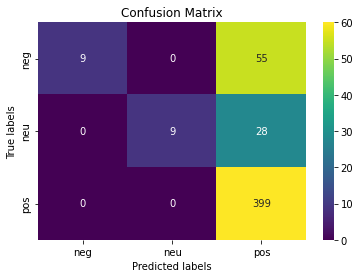

In [12]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=60); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);

# Task 6:
## - Open balanced database

In [13]:
train_data = pd.read_csv("/content/balanced.csv")
train_data = train_data.drop(columns="Unnamed: 0")
y = train_data.iloc[:,1].values
test_data = train_data

# Task 7:
## - Remove stopwords from text

In [14]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [15]:
corpus= []
corpus1= []
for i in range(0, len(train_data)):
    corpus.append(review_to_words(train_data['Text'][i]))
    corpus1.append(review_to_words(train_data['Text'][i]))
    
train_data['new_Phrase']=corpus
train_data.drop(['Text'],axis=1,inplace=True)

# Task 8:
## - Train Random Forest with balanced database

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:,1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.8, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

# Task 9:
## - Show results for balanced database

In [18]:
from sklearn import metrics
tp_neg, tp1, tp2, tp3, tp_neu, tp5, tp6, tp7, tp_pos = metrics.confusion_matrix(y, y_real_pred).ravel()
fn_neg = tp1+tp2; fn_neu = tp3+tp5; fn_pos = tp6+tp7
fp_neg = tp3+tp6; fp_neu = tp1+tp7; fp_pos = tp2+tp5
vn_neg = tp_neu+tp5+tp7+tp_pos; vn_neu = tp_neg+tp6+tp2+tp_pos; vn_pos = tp_neg+tp1+tp3+tp_neu
print("VP neg:" + str(tp_neg) + "\tVP neu:" + str(tp_neu) + "\tVP pos:" + str(tp_pos))
print("FN neg:" + str(fn_neg) + "\tFN neu:" + str(fn_neu) + "\tFN pos:" + str(fn_pos))
print("FP neg:" + str(fp_neg) + "\tFP neu:" + str(fp_neu) + "\tFP pos:" + str(fp_pos))
print("VN neg:" + str(vn_neg) + "\tVN neu:" + str(vn_neu) + "\tVN pos:" + str(vn_pos))
target_names = ['negative','neutral','positive']
print(classification_report(y, y_real_pred, target_names=target_names))

VP neg:341	VP neu:361	VP pos:347
FN neg:58	FN neu:38	FN pos:52
FP neg:49	FP neu:20	FP pos:79
VN neg:749	VN neu:778	VN pos:719
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86       399
     neutral       0.95      0.90      0.93       399
    positive       0.81      0.87      0.84       399

    accuracy                           0.88      1197
   macro avg       0.88      0.88      0.88      1197
weighted avg       0.88      0.88      0.88      1197



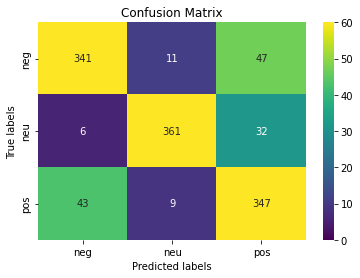

In [19]:
cm = metrics.confusion_matrix(y, y_real_pred)
ax= plt.subplot()
color = sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap=color, vmin=0, vmax=60); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['neg', 'neu', 'pos']); ax.yaxis.set_ticklabels(['neg', 'neu', 'pos']);